# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

from utils.Perspectiver import Perspectiver

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
data = pd.read_csv("output.csv")
data["Defect"] = data["Path"].apply(lambda x: x.split("/")[-2])

In [ ]:
X = data[["sp", "sr", "k", "optimized_score"]]
y = data["Defect"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
report

In [16]:
categories = ["Crazing", "Inclusion", "Patches", "Pitted", "Rolled", "Scratches"]
data_per_categ = {}
for categ in categories:
    data_per_categ[categ] = data[data["Path"].str.contains(categ)].drop(columns = ["Path"])

# Analysis

In [32]:
def plot_info(df):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        axes[i].hist(df[col], bins=10, alpha=0.7, color="blue", edgecolor="black")
        axes[i].set_title(f"Histograma de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

def plot_histograms(df_dict, column_name):
    """
    Genera histogramas de frecuencias para una columna específica en múltiples DataFrames.
    
    Parámetros:
        df_dict (dict): Diccionario donde las claves son nombres de los DataFrames y los valores son los DataFrames.
        column_name (str): Nombre de la columna de la cual se generará el histograma.
    """
    for name, df in df_dict.items():
        if isinstance(df, pd.DataFrame) and column_name in df.columns:
            plt.figure(figsize=(8, 5))
            plt.hist(df[column_name].dropna(), bins=20, edgecolor='black', alpha=0.7)
            plt.xlabel(column_name)
            plt.ylabel("Frecuencia")
            plt.title(f"Histograma de {column_name} en {name}")
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.show()
        else:
            print(f"El DataFrame '{name}' no es válido o no contiene la columna '{column_name}'.")

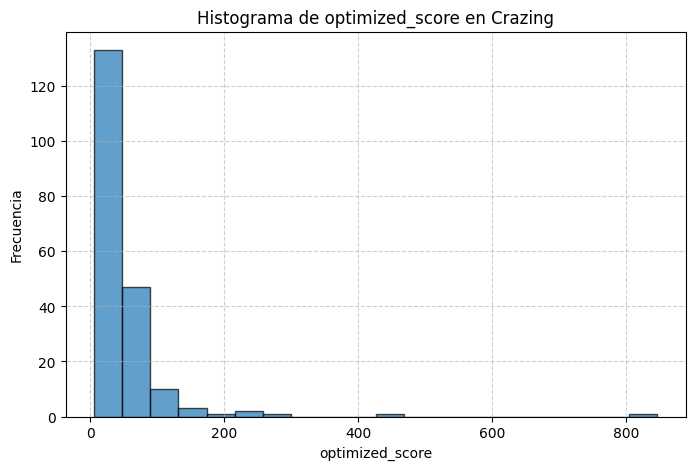

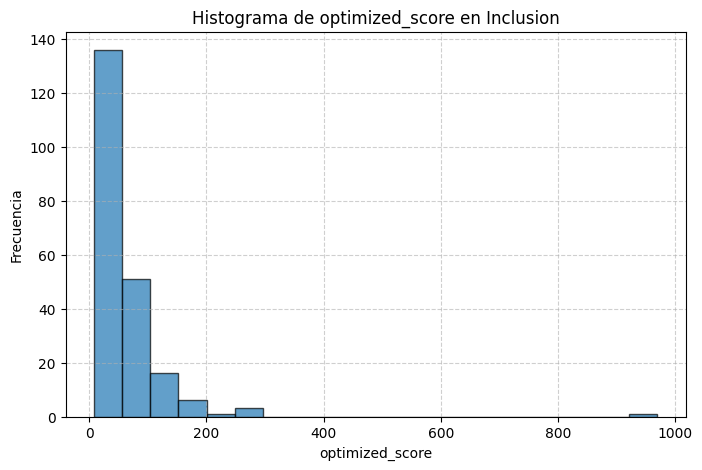

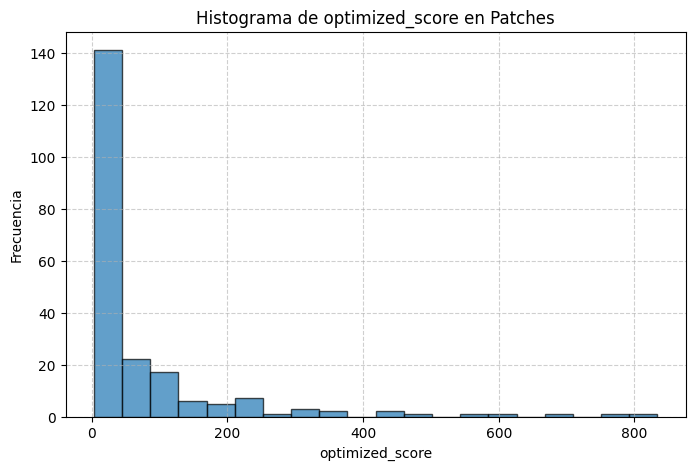

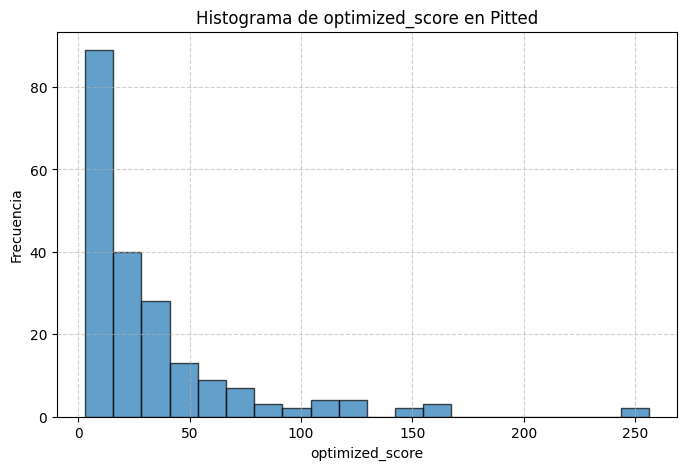

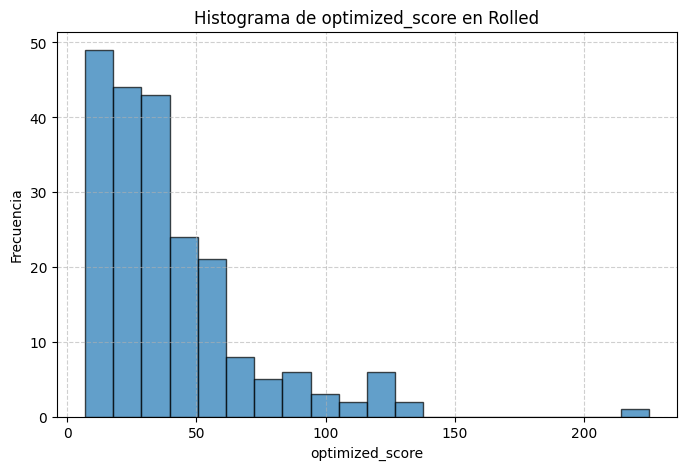

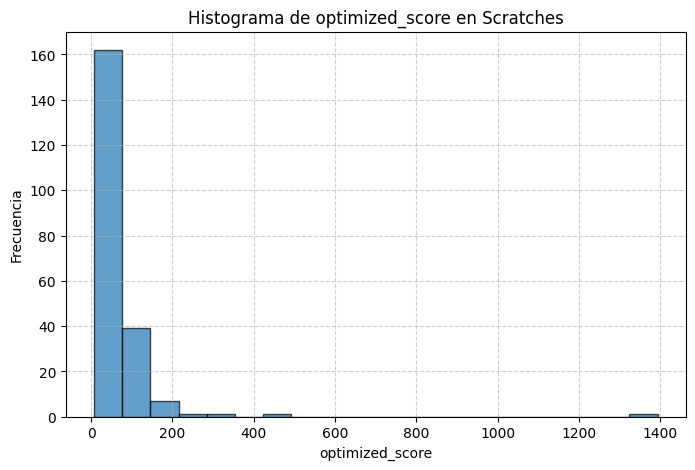

In [35]:
plot_histograms(data_per_categ, column_name="optimized_score")